In [30]:
import kagglehub
import pandas as pd
import os
import seaborn as sns
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path_congress = kagglehub.dataset_download(
    "shabbarank/congressional-trading-inception-to-march-23"
)

In [ ]:
# Try with different encodings for the congress data
try:
    congress_df = pd.read_csv(
        os.path.join(path_congress, "copy of congress-trading-all (3).csv"),
        encoding="latin-1",
    )
except UnicodeDecodeError:
    try:
        congress_df = pd.read_csv(
            os.path.join(path_congress, "copy of congress-trading-all (3).csv"),
            encoding="cp1252",
        )
    except UnicodeDecodeError:
        congress_df = pd.read_csv(
            os.path.join(path_congress, "copy of congress-trading-all (3).csv"),
            encoding="iso-8859-1",
        )

# Load stock prices (this one should work fine)
stock_prices_df = pd.read_csv(
    os.path.join(path_congress, "stock_prices_2023_to_now.csv")
)

print("Congressional Trading Data Shape:", congress_df.shape)
print("Stock Prices Data Shape:", stock_prices_df.shape)

Congressional Trading Data Shape: (46467, 19)
Stock Prices Data Shape: (187126, 3)


In [27]:
congress_df.head()

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
0,NGL,ST,NGL ENERGY PARTNERS LP COMMON UNITS REPRESENTI...,"Monday, March 11, 2024",Sale,"$15,001 - $50,000",NEW,EQUITABLE RETIREMENT ACCOUNT,NaN,Mark Dr Green,2024-03-13,R,TN07,House,NaN,2024-03-14,1.523296,Tennessee,2024-03-14
1,FCX,ST,"FREEPORT-MCMORAN, INC. COMMON STOCK","Thursday, February 29, 2024",Sale,"$1,001 - $15,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,NaN,Josh Gottheimer,2024-03-07,D,NJ05,House,NaN,2024-03-08,17.325032,New Jersey,2024-03-08
2,V,ST,VISA INC.,"Thursday, February 29, 2024",Purchase,"$1,001 - $15,000",NEW,TRUST ONE,NaN,Pete Sessions,2024-03-07,R,TX17,House,NaN,2024-03-08,-0.518105,Texas,2024-03-08
3,APPLE INC. (XNAS:AAPL),ST,APPLE INC. - COMMON STOCK,"Thursday, February 29, 2024",Purchase,$360.00,NEW,IRA ONE,NaN,Pete Sessions,2024-02-29,R,TX17,House,NaN,2024-03-01,-5.157553,Texas,2024-03-01
4,MSFT,ST,MICROSOFT CORPORATION - COMMON STOCK,"Thursday, February 29, 2024",Sale,"$100,001 - $250,000",NEW,NaN,VESTED SHARES SOLD TO SEPARATE TRUST NOT FOR T...,Suzan K. Delbene,2024-03-08,D,WA01,House,NaN,2024-03-11,0.012454,Washington,2024-03-11


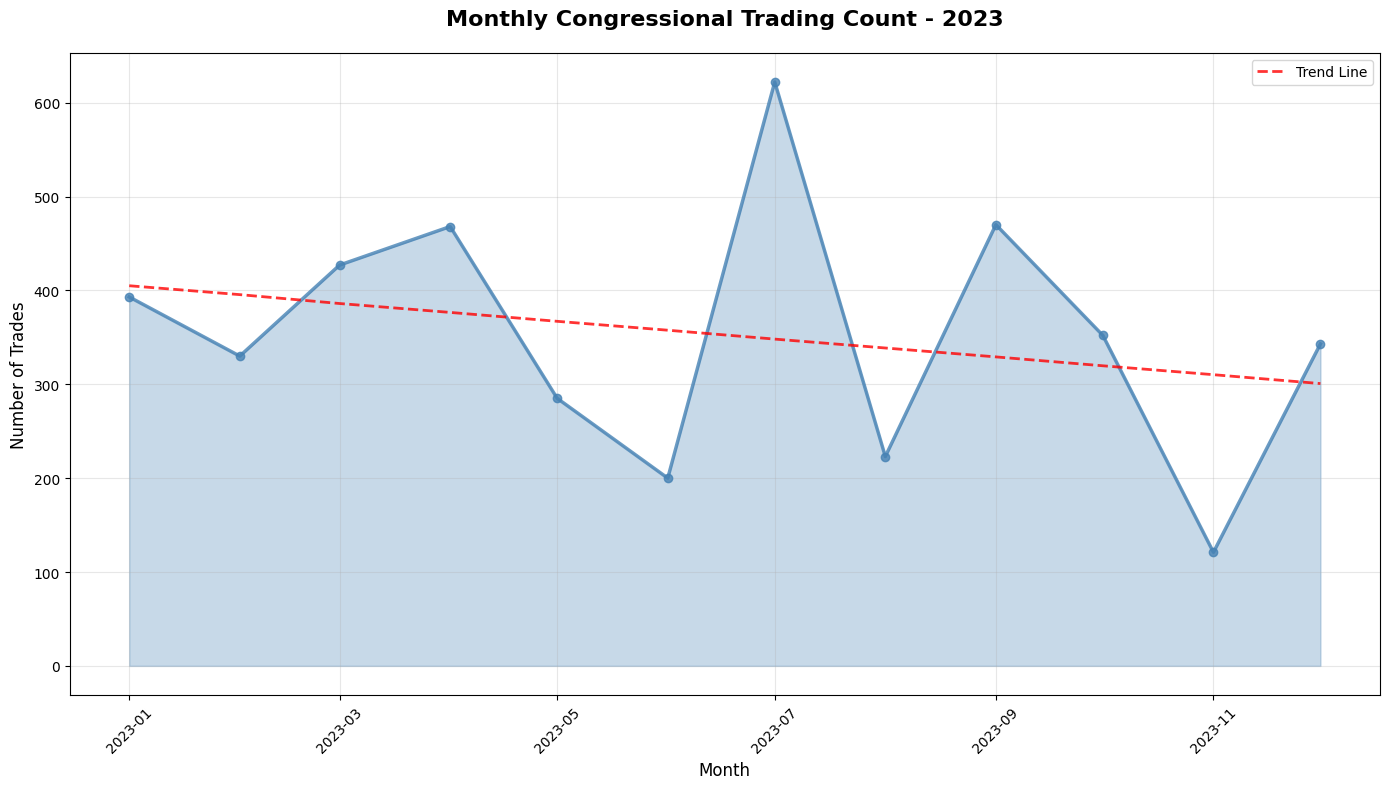

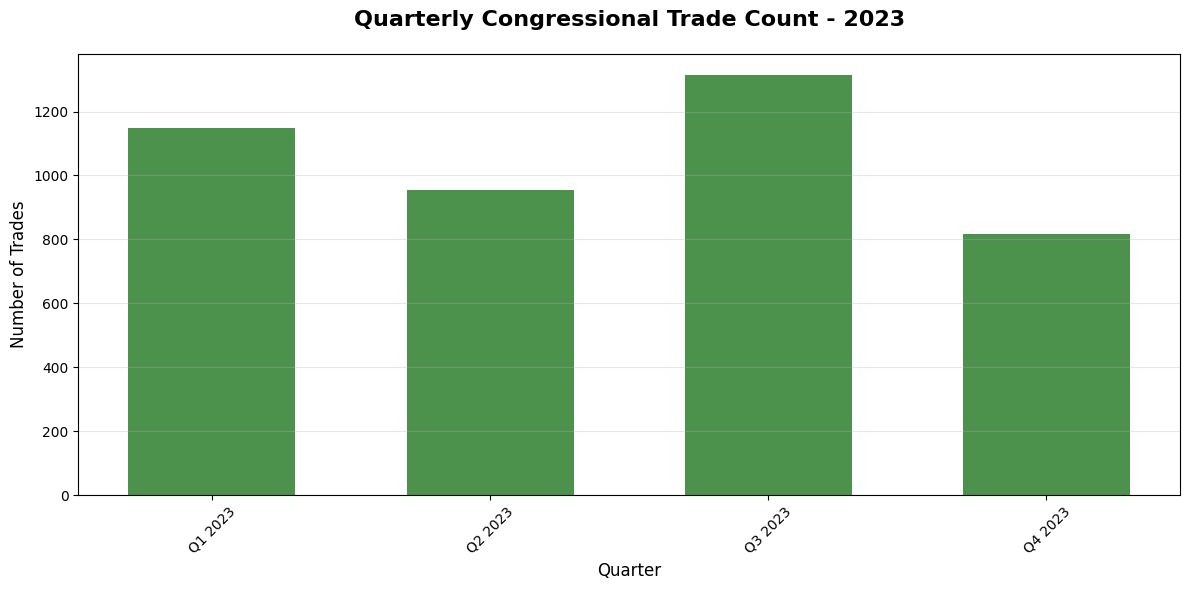

=== 2023 Congressional Trade Distribution Summary ===
Total number of trades in 2023: 4,234
Date range: 2023-01-03 to 2023-12-29
Total months with trades in 2023: 12
Average trades per month in 2023: 352.8
Median trades per month in 2023: 347.5
Max trades in a month in 2023: 622
Min trades in a month in 2023: 121

=== Most Active Months in 2023 ===
July 2023: 622 trades
September 2023: 470 trades
April 2023: 468 trades
March 2023: 427 trades
January 2023: 393 trades
October 2023: 352 trades
December 2023: 343 trades
February 2023: 330 trades
May 2023: 285 trades
August 2023: 223 trades
June 2023: 200 trades
November 2023: 121 trades


In [ ]:
# Convert Traded column to datetime - congress_df already has this column
congress_df["Traded"] = pd.to_datetime(
    congress_df["Traded"], format="%A, %B %d, %Y", errors="coerce"
)

# Filter for 2023 only
congress_2023 = congress_df[congress_df["Traded"].dt.year == 2023]

# Create visualization aggregated by month
plt.figure(figsize=(14, 8))

# Monthly trade count distribution for 2023
monthly_counts = congress_2023.groupby(congress_2023["Traded"].dt.to_period("M")).size()

# Convert period index to datetime for better plotting
monthly_counts.index = monthly_counts.index.to_timestamp()

plt.plot(
    monthly_counts.index,
    monthly_counts.values,
    alpha=0.8,
    linewidth=2.5,
    color="steelblue",
    marker="o",
    markersize=6,
)
plt.fill_between(
    monthly_counts.index, monthly_counts.values, alpha=0.3, color="steelblue"
)

plt.title(
    "Monthly Congressional Trading Count - 2023", fontsize=16, fontweight="bold", pad=20
)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Trades", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(range(len(monthly_counts)), monthly_counts.values, 1)
p = np.poly1d(z)
plt.plot(
    monthly_counts.index,
    p(range(len(monthly_counts))),
    "r--",
    alpha=0.8,
    linewidth=2,
    label="Trend Line",
)

plt.legend()
plt.tight_layout()
plt.show()

# Alternative: Quarterly aggregation for 2023
plt.figure(figsize=(12, 6))

# Quarterly trade count distribution for 2023
quarterly_counts = congress_2023.groupby(
    congress_2023["Traded"].dt.to_period("Q")
).size()
quarterly_counts.index = quarterly_counts.index.to_timestamp()

# Bar chart for quarterly data
plt.bar(
    range(len(quarterly_counts)),
    quarterly_counts.values,
    alpha=0.7,
    color="darkgreen",
    width=0.6,
)
plt.title(
    "Quarterly Congressional Trade Count - 2023", fontsize=16, fontweight="bold", pad=20
)
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Number of Trades", fontsize=12)
plt.xticks(
    range(len(quarterly_counts)),
    [f"Q{q.quarter} {q.year}" for q in quarterly_counts.index],
    rotation=45,
)
plt.grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

# Print summary statistics for 2023
print("=== 2023 Congressional Trade Distribution Summary ===")
print(f"Total number of trades in 2023: {len(congress_2023):,}")
print(
    f"Date range: {congress_2023['Traded'].min().date()} to {congress_2023['Traded'].max().date()}"
)
print(f"Total months with trades in 2023: {len(monthly_counts)}")
print(f"Average trades per month in 2023: {monthly_counts.mean():.1f}")
print(f"Median trades per month in 2023: {monthly_counts.median():.1f}")
print(f"Max trades in a month in 2023: {monthly_counts.max()}")
print(f"Min trades in a month in 2023: {monthly_counts.min()}")
print("\n=== Most Active Months in 2023 ===")
top_months = monthly_counts.nlargest(len(monthly_counts))
for date, count in top_months.items():
    print(f"{date.strftime('%B %Y')}: {count:,} trades")

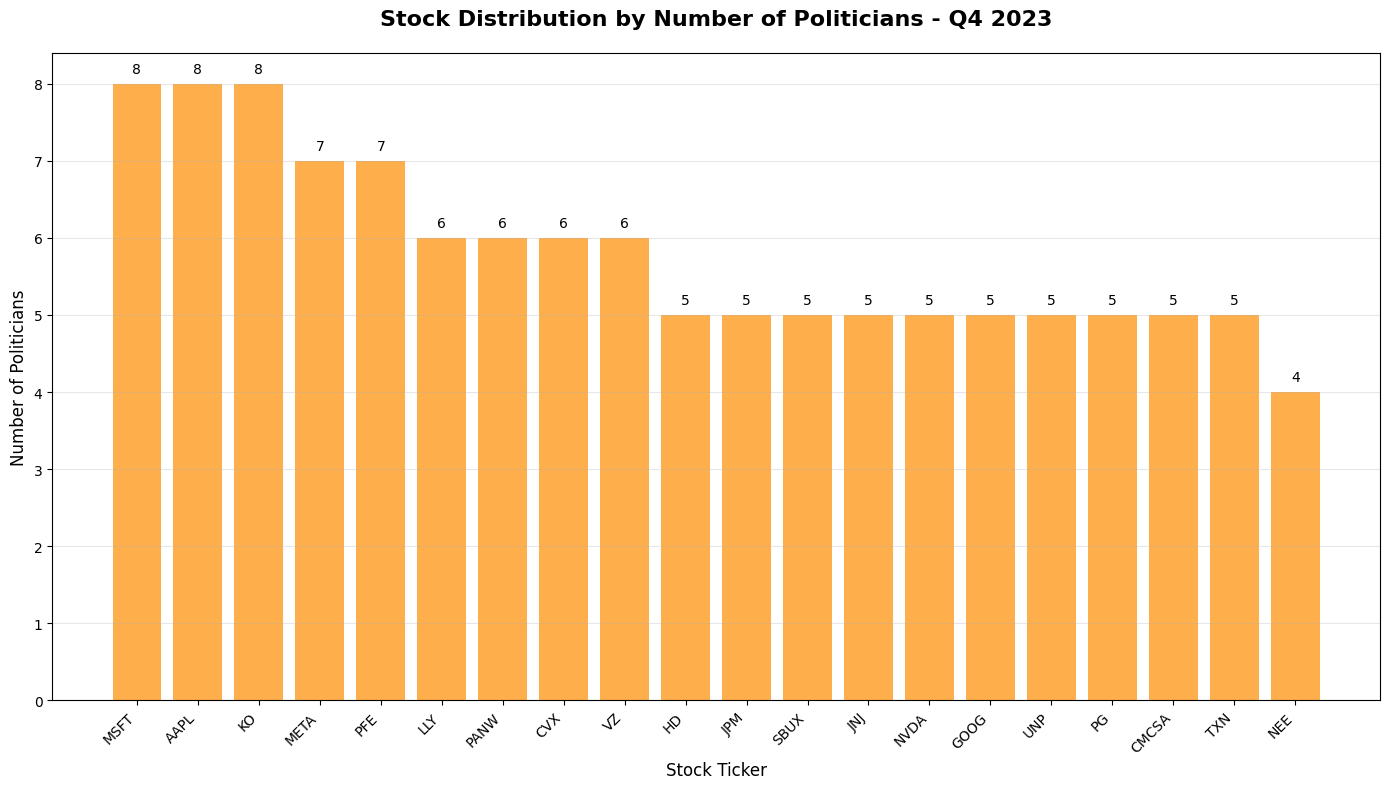

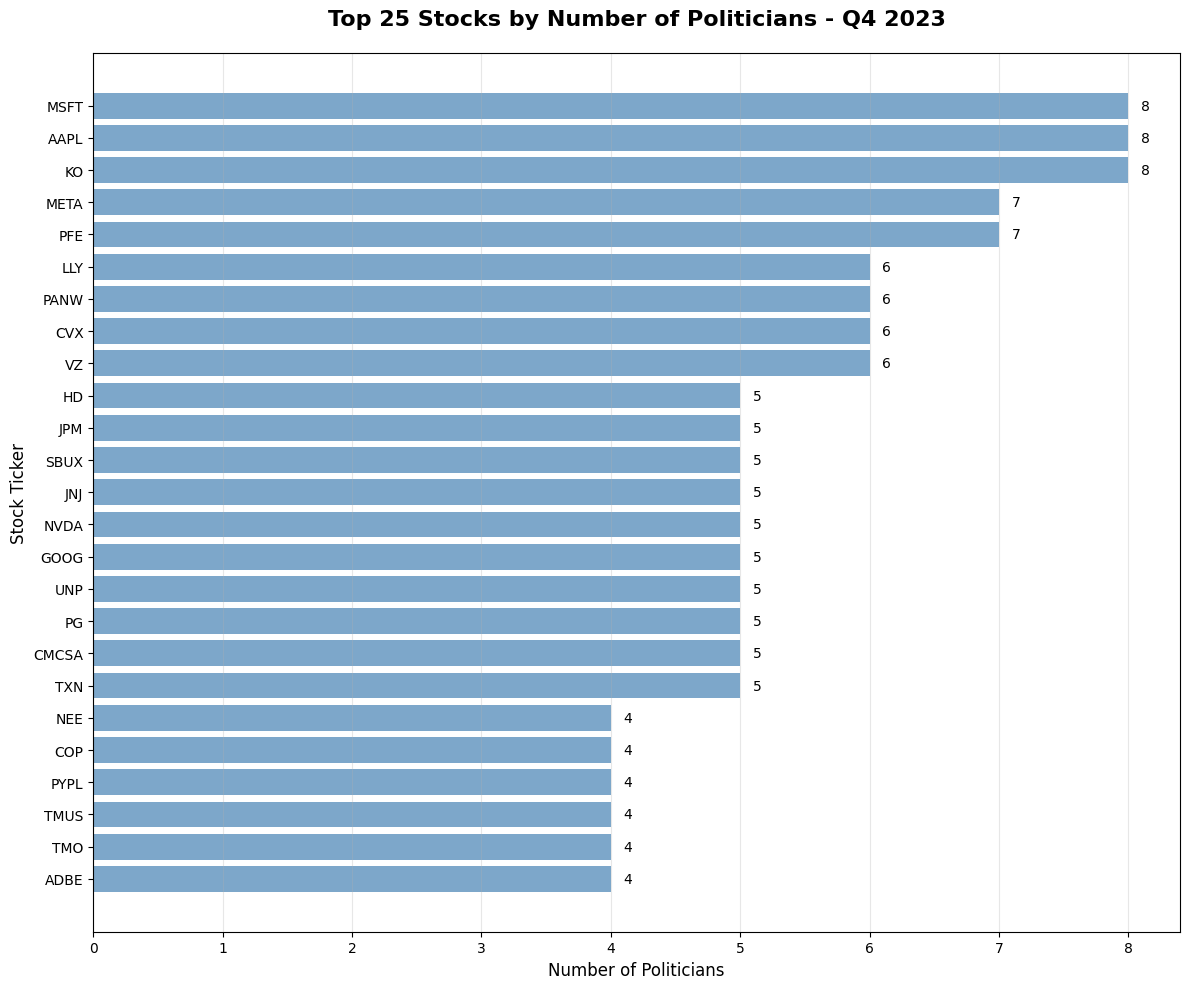

=== Q4 2023 Stock Investment Distribution Summary ===
Total number of trades in Q4 2023: 816
Total unique stocks traded: 364
Total unique politicians trading: 47
Average politicians per stock: 1.7
Median politicians per stock: 1.0
Max politicians trading same stock: 8

=== Top 10 Most Popular Stocks (by number of politicians) ===
MSFT: 8 politicians
AAPL: 8 politicians
KO: 8 politicians
META: 7 politicians
PFE: 7 politicians
LLY: 6 politicians
PANW: 6 politicians
CVX: 6 politicians
VZ: 6 politicians
HD: 5 politicians

=== Stocks traded by only 1 politician: 253 stocks ===


In [ ]:
# Filter for Q4 2023 (October, November, December)
q4_2023 = congress_2023[congress_2023["Traded"].dt.quarter == 4]

# Count unique politicians per stock ticker
stock_politician_counts = (
    q4_2023.groupby("Ticker")["Name"].nunique().sort_values(ascending=False)
)

# Create visualization
plt.figure(figsize=(14, 8))

# Show top 20 stocks for better readability
top_stocks = stock_politician_counts.head(20)

bars = plt.bar(range(len(top_stocks)), top_stocks.values, alpha=0.7, color="darkorange")
plt.title(
    "Stock Distribution by Number of Politicians - Q4 2023",
    fontsize=16,
    fontweight="bold",
    pad=20,
)
plt.xlabel("Stock Ticker", fontsize=12)
plt.ylabel("Number of Politicians", fontsize=12)
plt.xticks(range(len(top_stocks)), top_stocks.index, rotation=45, ha="right")
plt.grid(True, alpha=0.3, axis="y")

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.1,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.tight_layout()
plt.show()

# Alternative: Horizontal bar chart for better readability with more stocks
plt.figure(figsize=(12, 10))

top_stocks_25 = stock_politician_counts.head(25)
bars = plt.barh(
    range(len(top_stocks_25)), top_stocks_25.values, alpha=0.7, color="steelblue"
)
plt.title(
    "Top 25 Stocks by Number of Politicians - Q4 2023",
    fontsize=16,
    fontweight="bold",
    pad=20,
)
plt.xlabel("Number of Politicians", fontsize=12)
plt.ylabel("Stock Ticker", fontsize=12)
plt.yticks(range(len(top_stocks_25)), top_stocks_25.index)
plt.grid(True, alpha=0.3, axis="x")

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(
        width + 0.1,
        bar.get_y() + bar.get_height() / 2.0,
        f"{int(width)}",
        ha="left",
        va="center",
        fontsize=10,
    )

plt.gca().invert_yaxis()  # Invert y-axis to show highest at top
plt.tight_layout()
plt.show()

# Print summary statistics
print("=== Q4 2023 Stock Investment Distribution Summary ===")
print(f"Total number of trades in Q4 2023: {len(q4_2023):,}")
print(f"Total unique stocks traded: {len(stock_politician_counts)}")
print(f"Total unique politicians trading: {q4_2023['Name'].nunique()}")
print(f"Average politicians per stock: {stock_politician_counts.mean():.1f}")
print(f"Median politicians per stock: {stock_politician_counts.median():.1f}")
print(f"Max politicians trading same stock: {stock_politician_counts.max()}")

print("\n=== Top 10 Most Popular Stocks (by number of politicians) ===")
for ticker, count in stock_politician_counts.head(10).items():
    print(f"{ticker}: {count} politicians")

print(
    f"\n=== Stocks traded by only 1 politician: {(stock_politician_counts == 1).sum()} stocks ==="
)

Found 6 trades for Nancy Pelosi in 2023


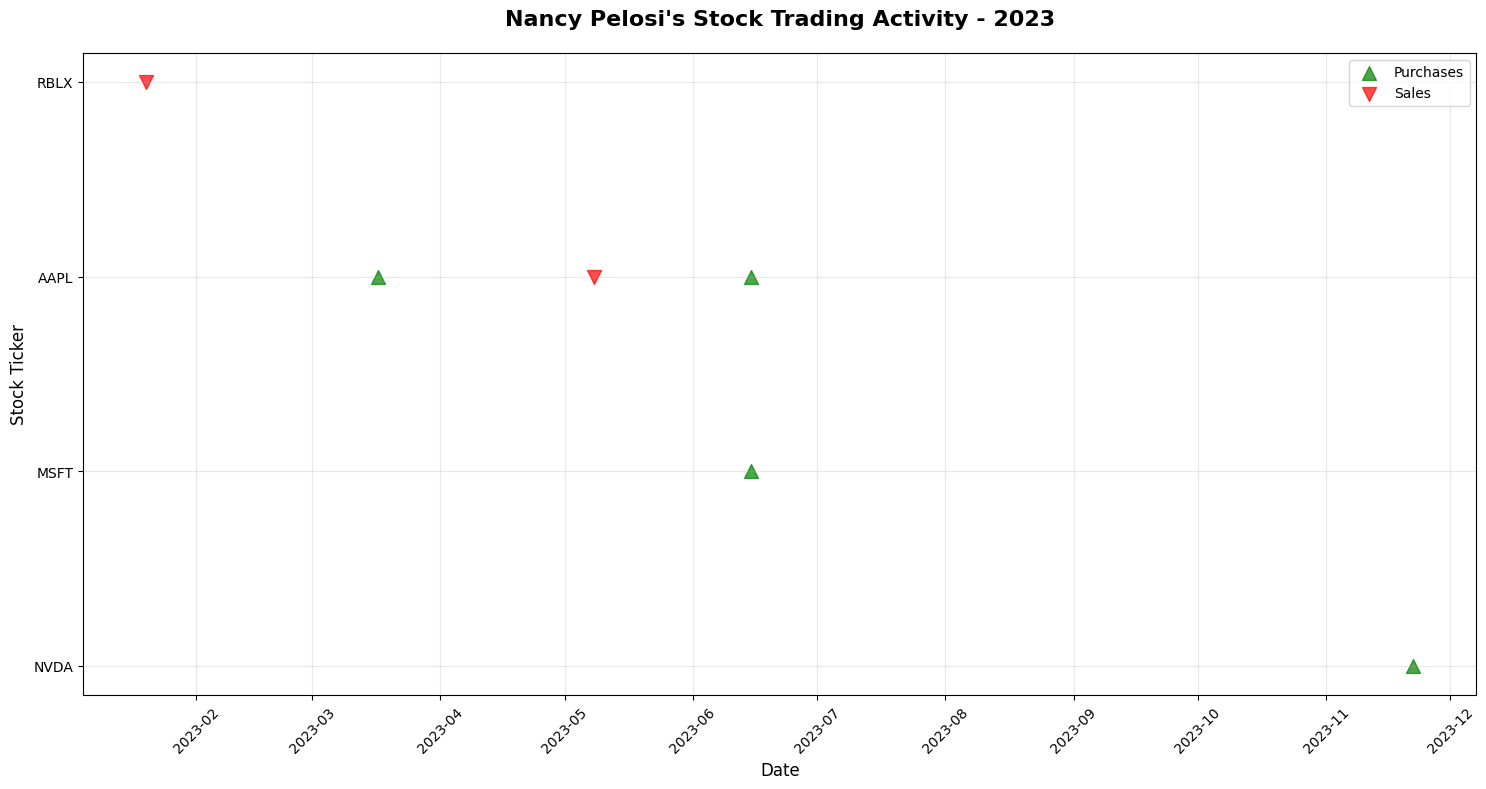

<Figure size 1400x800 with 0 Axes>

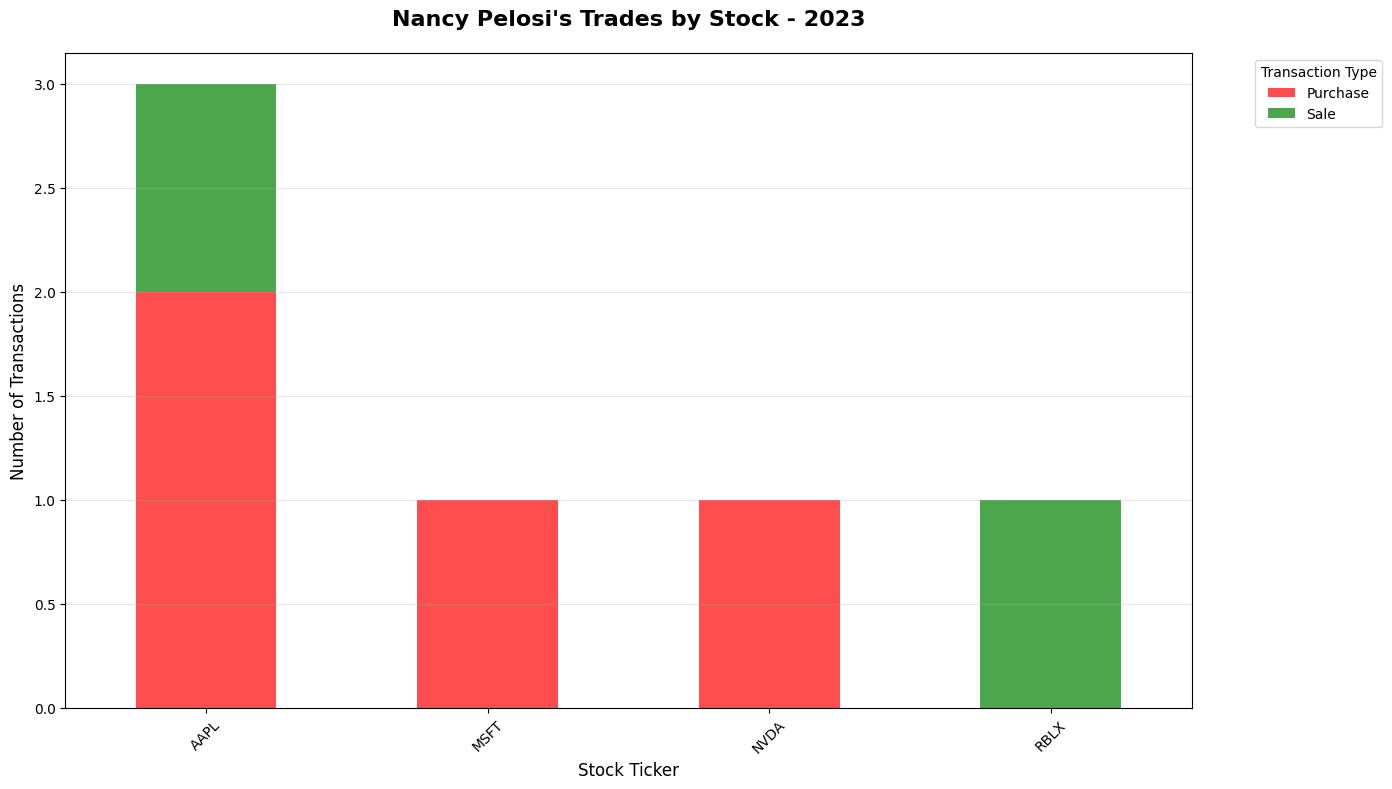

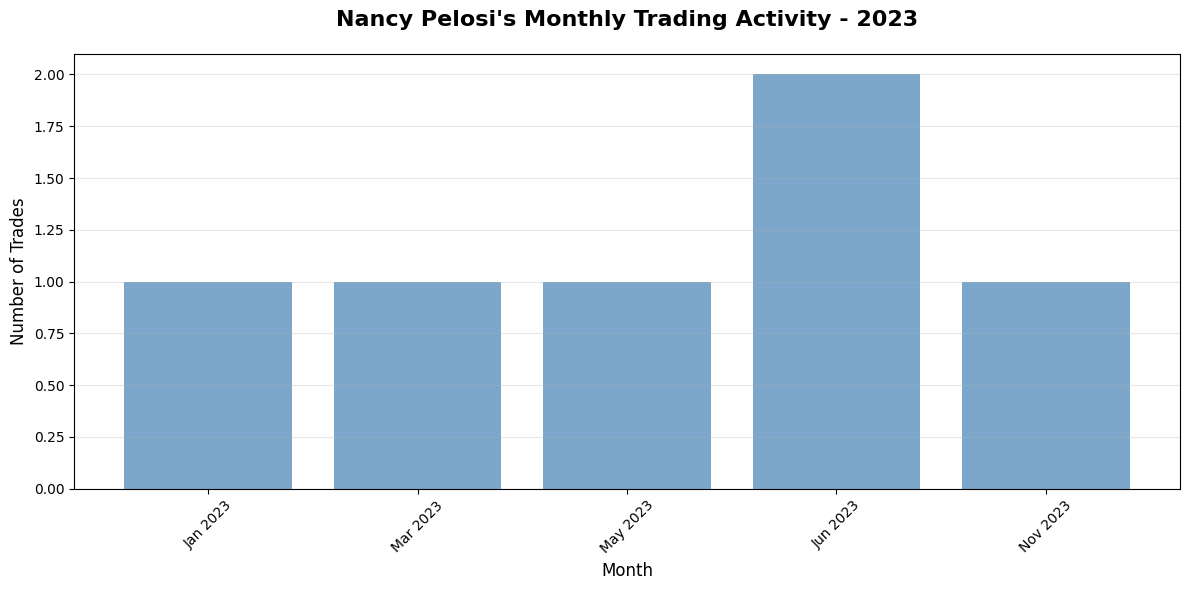

=== Nancy Pelosi's 2023 Trading Summary ===
Total trades: 6
Unique stocks traded: 4
Date range: 2023-01-20 to 2023-11-22

=== Transaction Types ===
Purchase: 4
Sale: 2

=== Stocks Traded (with transaction details) ===

🔸 NVDA (NVIDIA CORPORATION)
   • Purchase on 2023-11-22 ($1,000,001 - $5,000,000)

🔸 MSFT (MICROSOFT CORPORATION)
   • Purchase on 2023-06-15 ($500,001 - $1,000,000)

🔸 AAPL (APPLE INC.)
   • Purchase on 2023-06-15 ($250,001 - $500,000)
   • Sale on 2023-05-08 ($500,001 - $1,000,000)
   • Purchase on 2023-03-17 ($500,001 - $1,000,000)

🔸 RBLX (ROBLOX CORPORATION CLASS A)
   • Sale on 2023-01-20 ($1.00 - $100)


In [ ]:
# Filter for Nancy Pelosi's trades in 2023
pelosi_trades_2023 = congress_2023[
    congress_2023["Name"].str.contains("Pelosi", case=False, na=False)
]

# Check if we found any trades
if len(pelosi_trades_2023) == 0:
    print("No trades found for Nancy Pelosi in 2023")
    # Let's check what names are available
    print("\nAvailable politician names containing 'Pelosi':")
    pelosi_variants = congress_2023[
        congress_2023["Name"].str.contains("Pelosi", case=False, na=False)
    ]["Name"].unique()
    print(pelosi_variants)
else:
    print(f"Found {len(pelosi_trades_2023)} trades for Nancy Pelosi in 2023")

# Create visualizations for Pelosi's trades
if len(pelosi_trades_2023) > 0:
    # 1. Timeline of all trades
    plt.figure(figsize=(15, 8))

    # Separate purchases and sales
    purchases = pelosi_trades_2023[
        pelosi_trades_2023["Transaction"].str.contains("Purchase", case=False, na=False)
    ]
    sales = pelosi_trades_2023[
        pelosi_trades_2023["Transaction"].str.contains("Sale", case=False, na=False)
    ]

    # Plot purchases and sales
    if len(purchases) > 0:
        plt.scatter(
            purchases["Traded"],
            purchases["Ticker"],
            c="green",
            alpha=0.7,
            s=100,
            label="Purchases",
            marker="^",
        )
    if len(sales) > 0:
        plt.scatter(
            sales["Traded"],
            sales["Ticker"],
            c="red",
            alpha=0.7,
            s=100,
            label="Sales",
            marker="v",
        )

    plt.title(
        "Nancy Pelosi's Stock Trading Activity - 2023",
        fontsize=16,
        fontweight="bold",
        pad=20,
    )
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Stock Ticker", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 2. Bar chart of stocks by transaction type
    plt.figure(figsize=(14, 8))

    # Count transactions by ticker and type
    transaction_summary = (
        pelosi_trades_2023.groupby(["Ticker", "Transaction"])
        .size()
        .unstack(fill_value=0)
    )

    # Create stacked bar chart
    ax = transaction_summary.plot(
        kind="bar",
        stacked=True,
        figsize=(14, 8),
        color=["red", "green", "orange", "blue"],
        alpha=0.7,
    )

    plt.title(
        "Nancy Pelosi's Trades by Stock - 2023", fontsize=16, fontweight="bold", pad=20
    )
    plt.xlabel("Stock Ticker", fontsize=12)
    plt.ylabel("Number of Transactions", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Transaction Type", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, alpha=0.3, axis="y")
    plt.tight_layout()
    plt.show()

    # 3. Monthly trading activity
    plt.figure(figsize=(12, 6))

    monthly_activity = pelosi_trades_2023.groupby(
        pelosi_trades_2023["Traded"].dt.to_period("M")
    ).size()
    monthly_activity.index = monthly_activity.index.to_timestamp()

    plt.bar(
        range(len(monthly_activity)),
        monthly_activity.values,
        alpha=0.7,
        color="steelblue",
    )
    plt.title(
        "Nancy Pelosi's Monthly Trading Activity - 2023",
        fontsize=16,
        fontweight="bold",
        pad=20,
    )
    plt.xlabel("Month", fontsize=12)
    plt.ylabel("Number of Trades", fontsize=12)
    plt.xticks(
        range(len(monthly_activity)),
        [date.strftime("%b %Y") for date in monthly_activity.index],
        rotation=45,
    )
    plt.grid(True, alpha=0.3, axis="y")
    plt.tight_layout()
    plt.show()

    # Print detailed summary
    print("=== Nancy Pelosi's 2023 Trading Summary ===")
    print(f"Total trades: {len(pelosi_trades_2023)}")
    print(f"Unique stocks traded: {pelosi_trades_2023['Ticker'].nunique()}")
    print(
        f"Date range: {pelosi_trades_2023['Traded'].min().date()} to {pelosi_trades_2023['Traded'].max().date()}"
    )

    print("\n=== Transaction Types ===")
    transaction_counts = pelosi_trades_2023["Transaction"].value_counts()
    for transaction, count in transaction_counts.items():
        print(f"{transaction}: {count}")

    print("\n=== Stocks Traded (with transaction details) ===")
    for ticker in pelosi_trades_2023["Ticker"].unique():
        ticker_trades = pelosi_trades_2023[pelosi_trades_2023["Ticker"] == ticker]
        company_name = ticker_trades["Company"].iloc[0]
        print(f"\n🔸 {ticker} ({company_name})")

        for _, trade in ticker_trades.iterrows():
            trade_size = trade["Trade_Size_USD"]
            if isinstance(trade_size, (int, float)) and not pd.isna(trade_size):
                trade_size_str = f"${trade_size:,.0f}"
            else:
                trade_size_str = f"{trade_size}"

            print(
                f"   • {trade['Transaction']} on {trade['Traded'].strftime('%Y-%m-%d')} ({trade_size_str})"
            )

else:
    # If no exact match found, let's search more broadly
    print("\nLet's search for politicians with similar names:")
    similar_names = congress_2023["Name"].str.contains(
        "Nancy|Pelosi", case=False, na=False
    )
    if similar_names.any():
        potential_matches = congress_2023[similar_names]["Name"].unique()
        print("Potential matches:")
        for name in potential_matches:
            print(f"  - {name}")
    else:
        print("No politicians found with similar names")
        print("\nFirst 10 politician names in the dataset:")
        print(congress_2023["Name"].unique()[:10])

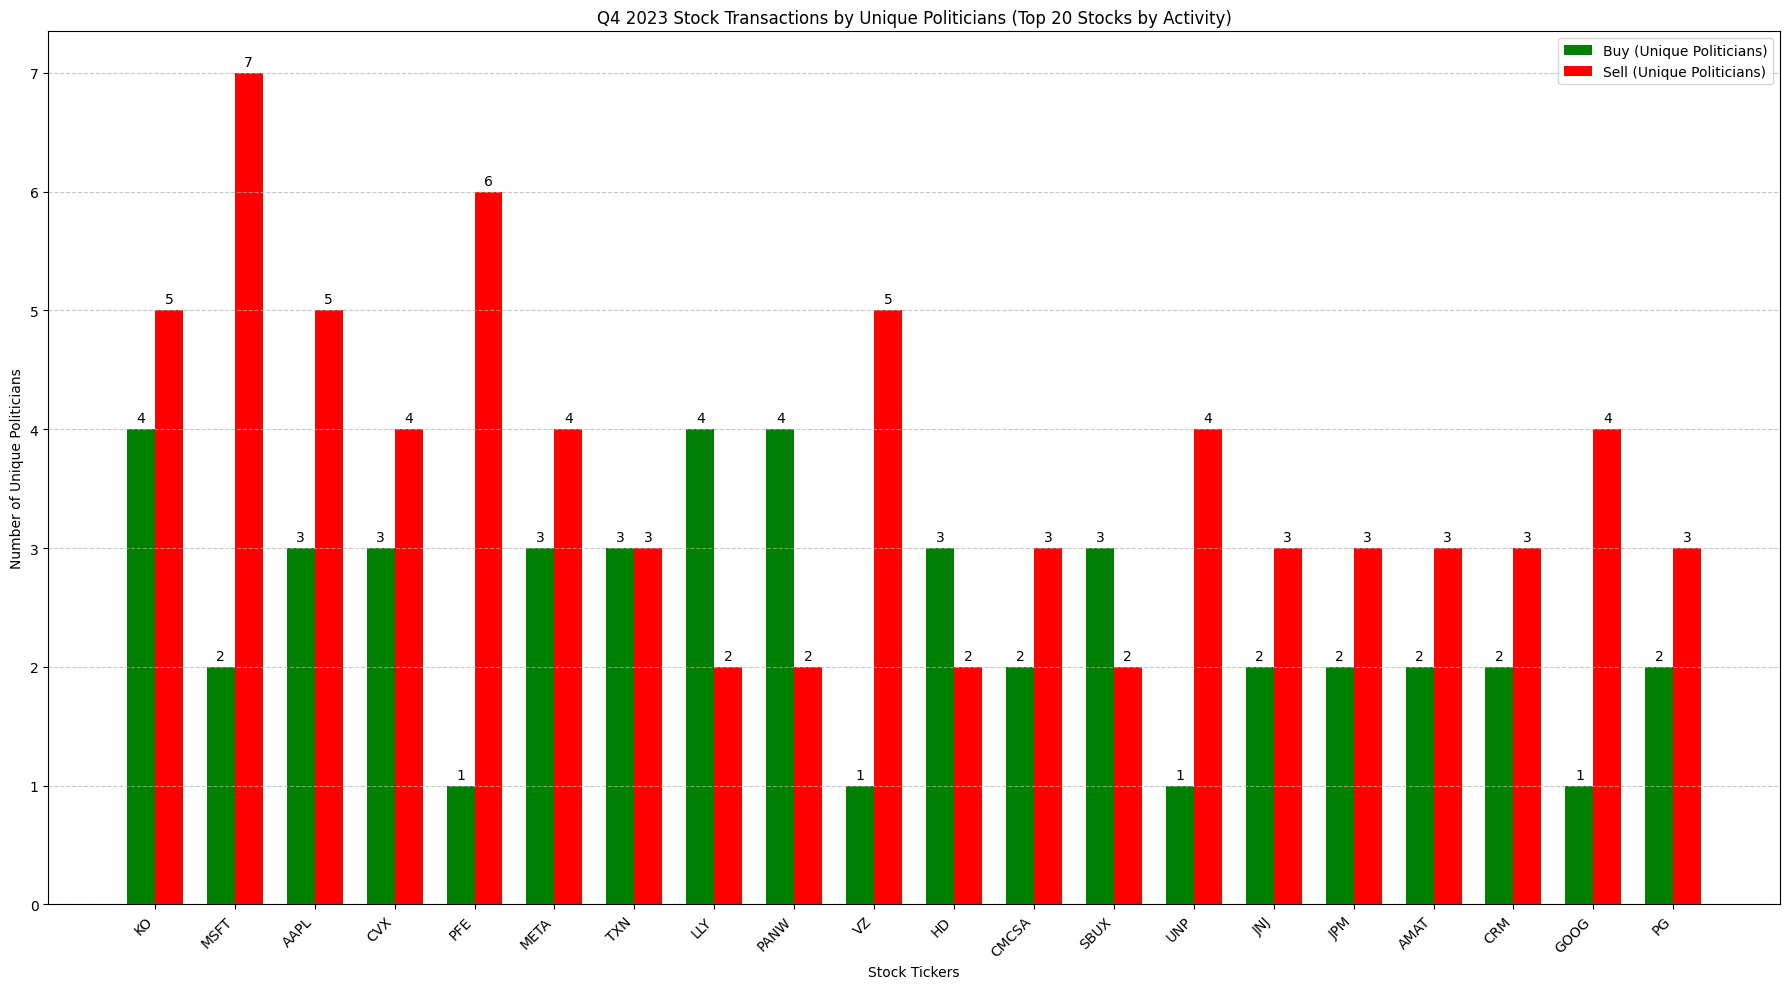


=== Example: Two Politicians Buying Same Stock on Same Day in Q4 2023 ===
On 2023-11-01, Josh Gottheimer and Michael Patrick Guest both bought stock: ANET.


In [ ]:
# Ensure 'Traded' column is in datetime format. If not, uncomment the next line:
# congress_df['Traded'] = pd.to_datetime(congress_df['Traded'])

# --- Task 1: Graph of Q4 2023 Buy/Sell Activity by Unique Politicians ---

# Filter for Q4 (October, November, December) of 2023
q4_trades_2023 = congress_df[
    (congress_df["Traded"].dt.month.isin([10, 11, 12]))
    & (congress_df["Traded"].dt.year == 2023)
].copy()

# Standardize transaction types for easier filtering
# Assuming 'Transaction' column might have variations like 'Purchase (Full)', 'Sale (Partial)'
q4_trades_2023.loc[:, "TransactionType"] = "Other"  # Initialize column
q4_trades_2023.loc[
    q4_trades_2023["Transaction"].str.contains("Purchase", case=False, na=False),
    "TransactionType",
] = "Buy"
q4_trades_2023.loc[
    q4_trades_2023["Transaction"].str.contains("Sale", case=False, na=False),
    "TransactionType",
] = "Sell"

# Separate purchases and sales in Q4 2023
q4_purchases_2023 = q4_trades_2023[q4_trades_2023["TransactionType"] == "Buy"]
q4_sales_2023 = q4_trades_2023[q4_trades_2023["TransactionType"] == "Sell"]

# Calculate unique politicians per stock for purchases
buy_politician_counts_2023 = q4_purchases_2023.groupby("Ticker")["Name"].nunique()

# Calculate unique politicians per stock for sales
sell_politician_counts_2023 = q4_sales_2023.groupby("Ticker")["Name"].nunique()

# Combine the data for plotting
plot_df_2023 = pd.DataFrame(
    {
        "Buy_UniquePoliticians": buy_politician_counts_2023,
        "Sell_UniquePoliticians": sell_politician_counts_2023,
    }
).fillna(0)

# Sort by total activity (sum of unique politicians for buys and sells) for better visualization
plot_df_2023["TotalActivity"] = (
    plot_df_2023["Buy_UniquePoliticians"] + plot_df_2023["Sell_UniquePoliticians"]
)
plot_df_2023 = plot_df_2023.sort_values(by="TotalActivity", ascending=False)

# You can adjust top_n to display more or fewer stocks
top_n = 20
plot_data_subset_2023 = plot_df_2023.head(top_n)

if not plot_data_subset_2023.empty:
    tickers_2023 = plot_data_subset_2023.index
    buy_counts_2023 = plot_data_subset_2023["Buy_UniquePoliticians"]
    sell_counts_2023 = plot_data_subset_2023["Sell_UniquePoliticians"]

    x_2023 = np.arange(len(tickers_2023))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(18, 10))
    rects1 = ax.bar(
        x_2023 - width / 2,
        buy_counts_2023,
        width,
        label="Buy (Unique Politicians)",
        color="green",
    )
    rects2 = ax.bar(
        x_2023 + width / 2,
        sell_counts_2023,
        width,
        label="Sell (Unique Politicians)",
        color="red",
    )

    ax.set_ylabel("Number of Unique Politicians")
    ax.set_xlabel("Stock Tickers")
    ax.set_title(
        f"Q4 2023 Stock Transactions by Unique Politicians (Top {len(plot_data_subset_2023)} Stocks by Activity)"
    )
    ax.set_xticks(x_2023)
    ax.set_xticklabels(tickers_2023, rotation=45, ha="right")
    ax.legend()
    ax.grid(True, axis="y", linestyle="--", alpha=0.7)

    # Add labels to bars
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()
    plt.show()
else:
    print("No Q4 2023 data to plot for buy/sell transactions by unique politicians.")

# --- Task 2: Find Two Politicians Who Bought the Same Stock on the Same Day in Q4 2023 ---

# Filter for 'Purchase' transactions from Q4 2023
q4_2023_all_purchases = congress_df[
    (congress_df["Transaction"].str.contains("Purchase", case=False, na=False))
    & (congress_df["Traded"].dt.month.isin([10, 11, 12]))
    & (congress_df["Traded"].dt.year == 2023)
].copy()

if not q4_2023_all_purchases.empty:
    # Ensure 'Traded' is just date for grouping, if it includes time
    q4_2023_all_purchases.loc[:, "TradeDate"] = q4_2023_all_purchases["Traded"].dt.date

    # Group by date and ticker, then aggregate unique names
    same_day_purchases_q4_2023 = (
        q4_2023_all_purchases.groupby(["TradeDate", "Ticker"])["Name"]
        .apply(lambda x: sorted(list(set(x))))
        .reset_index()
    )

    # Filter for instances where more than one unique politician made a purchase
    multi_politician_purchases_q4_2023 = same_day_purchases_q4_2023[
        same_day_purchases_q4_2023["Name"].apply(len) > 1
    ]

    if not multi_politician_purchases_q4_2023.empty:
        print(
            "\n=== Example: Two Politicians Buying Same Stock on Same Day in Q4 2023 ==="
        )
        # Take the first instance found
        example_instance_q4_2023 = multi_politician_purchases_q4_2023.iloc[0]

        trade_date_str_q4_2023 = pd.to_datetime(
            example_instance_q4_2023["TradeDate"]
        ).strftime("%Y-%m-%d")
        stock_ticker_q4_2023 = example_instance_q4_2023["Ticker"]
        politicians_involved_q4_2023 = example_instance_q4_2023[
            "Name"
        ]  # This is a list of unique names

        politician1_q4_2023 = politicians_involved_q4_2023[0]
        politician2_q4_2023 = politicians_involved_q4_2023[1]

        print(
            f"On {trade_date_str_q4_2023}, {politician1_q4_2023} and {politician2_q4_2023} both bought stock: {stock_ticker_q4_2023}."
        )
        if len(politicians_involved_q4_2023) > 2:
            other_politicians_count_q4_2023 = len(politicians_involved_q4_2023) - 2
            print(
                f"({other_politicians_count_q4_2023} other politician(s) also bought this stock on the same day: {', '.join(politicians_involved_q4_2023[2:])})"
            )
    else:
        print(
            "\nNo instances found in Q4 2023 where two or more politicians bought the same stock on the same day."
        )
else:
    print(
        "\nNo purchase transactions found in Q4 2023 to analyze for shared purchases."
    )

In [ ]:
# --- Task 3: Find ALL Instances of Multiple Politicians Buying Same Company Stock in Same Week in Q4 2023 ---

# Filter for 'Purchase' transactions from Q4 2023
q4_2023_purchases_for_weekly_analysis = congress_df[
    (congress_df["Transaction"].str.contains("Purchase", case=False, na=False))
    &
    # (congress_df['Traded'].dt.month.isin([10, 11, 12])) &
    (congress_df["Traded"].dt.year == 2023)
].copy()

if not q4_2023_purchases_for_weekly_analysis.empty:
    # Add week and year columns for grouping
    # Using ISO week date standard
    q4_2023_purchases_for_weekly_analysis.loc[:, "TradeYear"] = (
        q4_2023_purchases_for_weekly_analysis["Traded"].dt.isocalendar().year
    )
    q4_2023_purchases_for_weekly_analysis.loc[:, "TradeWeek"] = (
        q4_2023_purchases_for_weekly_analysis["Traded"].dt.isocalendar().week
    )

    # Group by year, week, and company, then aggregate unique names
    # Assuming 'Company' column exists. If not, you might want to use 'Ticker'.
    # If 'Company' can have variations for the same entity, further cleaning might be needed.
    same_week_company_purchases = (
        q4_2023_purchases_for_weekly_analysis.groupby(
            ["TradeYear", "TradeWeek", "Company"]  # Group by Company
        )["Name"]
        .apply(lambda x: sorted(list(set(x))))
        .reset_index()
    )

    # Filter for instances where more than one unique politician made a purchase in the same company in the same week
    multi_politician_weekly_company_purchases = same_week_company_purchases[
        same_week_company_purchases["Name"].apply(len) > 1
    ]

    if not multi_politician_weekly_company_purchases.empty:
        print(
            "\n=== All Instances: Multiple Politicians Buying Same Company Stock in Same Week (Q4 2023) ==="
        )

        for index, row in multi_politician_weekly_company_purchases.iterrows():
            trade_year = row["TradeYear"]
            trade_week = row["TradeWeek"]
            company_name = row["Company"]
            politicians_involved = row["Name"]

            politicians_list_str = ", ".join(politicians_involved)

            print(
                f"In Year {trade_year}, Week {trade_week}, Company: '{company_name}' was bought by: {politicians_list_str}."
            )

    else:
        print(
            "\nNo instances found in Q4 2023 where two or more politicians bought stock in the same company in the same week."
        )
else:
    print(
        "\nNo purchase transactions found in Q4 2023 to analyze for shared weekly company purchases."
    )


=== All Instances: Multiple Politicians Buying Same Company Stock in Same Week (Q4 2023) ===
In Year 2023, Week 7, Company: 'LAM RESEARCH CORPORATION' was bought by: Josh Gottheimer, William R. Keating.
In Year 2023, Week 9, Company: 'NVIDIA CORPORATION' was bought by: Daniel Goldman, Josh Gottheimer.
In Year 2023, Week 10, Company: 'ABBVIE INC.' was bought by: Daniel Goldman, Josh Gottheimer.
In Year 2023, Week 10, Company: 'JOHNSON & JOHNSON' was bought by: Daniel Goldman, Kevin Hern, Lloyd Doggett.
In Year 2023, Week 10, Company: 'NVIDIA CORPORATION' was bought by: Josh Gottheimer, Morgan Mcgarvey.
In Year 2023, Week 10, Company: 'SAREPTA THERAPEUTICS, INC.' was bought by: Daniel Goldman, Josh Gottheimer.
In Year 2023, Week 12, Company: 'HOME DEPOT, INC.' was bought by: Kevin Hern, Lloyd Doggett.
In Year 2023, Week 15, Company: 'MICROSOFT CORPORATION' was bought by: Daniel Goldman, Josh Gottheimer.
In Year 2023, Week 15, Company: 'NVIDIA CORPORATION' was bought by: Daniel Goldman, 

--- Reality Check 1: Monthly Trading Seasonality ---


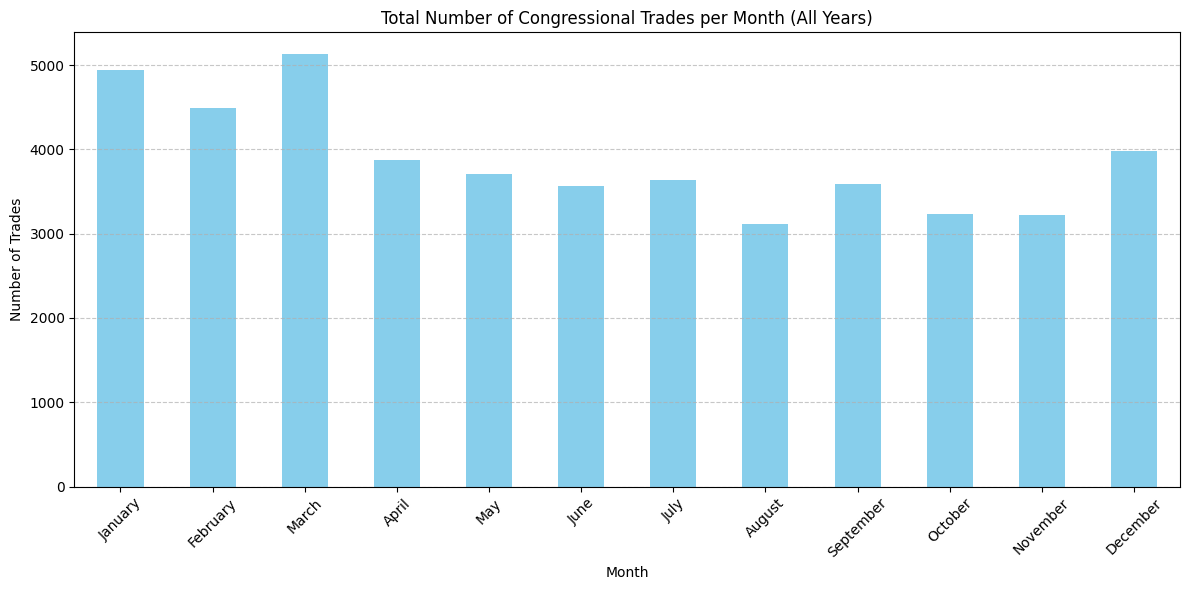


Explanation:
The bar chart above shows the total number of trades aggregated by month across all years in your dataset.
Observe if there are any clear peaks or troughs. For example:
- Are there fewer trades during summer months (June-August)?
- Is there a spike in trading activity towards the end of the year (October-December) perhaps due to tax-loss harvesting or portfolio rebalancing?
- Are there any other noticeable monthly patterns?
Compare these observations with your initial expectations for trading seasonality.


--- Reality Check 2: Distribution of Trade Sizes ---


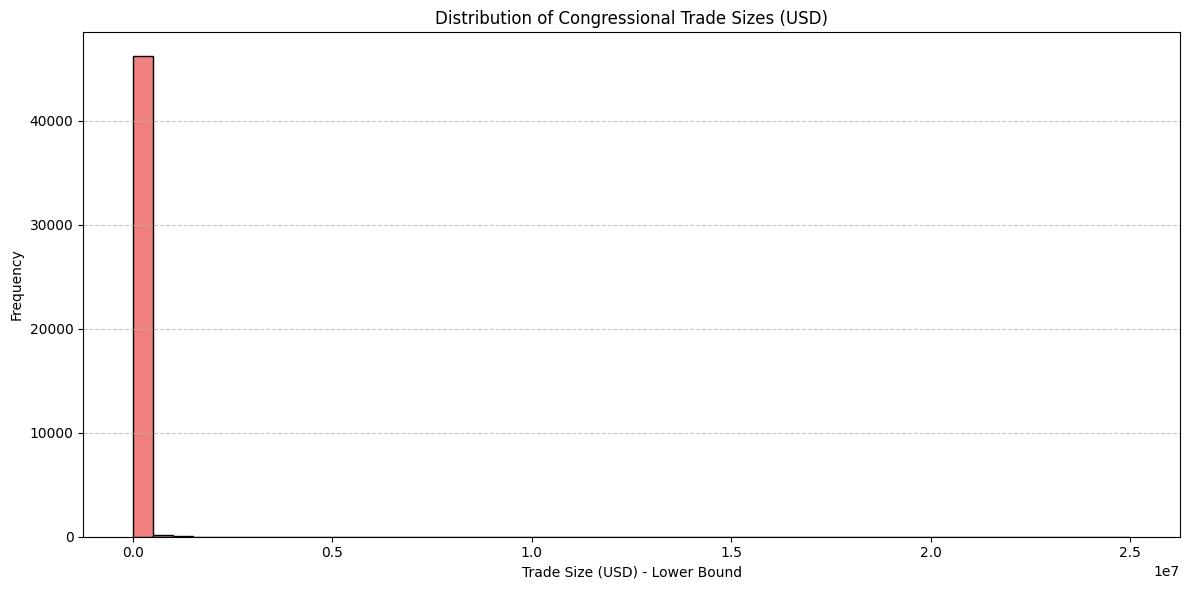


Explanation:
The histogram above shows the distribution of reported trade sizes (using the lower bound for ranges).
Typically, financial transaction data is right-skewed, meaning most trades are relatively small, with a few very large trades.
Observe the shape of the distribution:
- Is it heavily skewed to the right (many small trades, few large ones)? This is a common expectation.
- Are there distinct clusters of trade sizes?
- If the range of values is very large, using a logarithmic scale for the x-axis (trade size) or y-axis (frequency) might reveal more details.
This visualization helps understand the typical magnitude of trades and identify potential outliers or common transaction bands.


In [ ]:
print("--- Reality Check 1: Monthly Trading Seasonality ---")

if "Traded" not in congress_df.columns:
    print("Error: 'Traded' column not found in congress_df.")
else:
    # Extract month from 'Traded' date
    monthly_trades = congress_df.copy()
    monthly_trades["Month"] = monthly_trades["Traded"].dt.month_name()

    # Count trades per month
    trades_per_month = monthly_trades["Month"].value_counts()

    # Order months chronologically for plotting
    month_order = [
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ]
    trades_per_month = trades_per_month.reindex(month_order).fillna(0)

    if not trades_per_month.empty:
        plt.figure(figsize=(12, 6))
        trades_per_month.plot(kind="bar", color="skyblue")
        plt.title("Total Number of Congressional Trades per Month (All Years)")
        plt.xlabel("Month")
        plt.ylabel("Number of Trades")
        plt.xticks(rotation=45)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

        print("\nExplanation:")
        print(
            "The bar chart above shows the total number of trades aggregated by month across all years in your dataset."
        )
        print("Observe if there are any clear peaks or troughs. For example:")
        print("- Are there fewer trades during summer months (June-August)?")
        print(
            "- Is there a spike in trading activity towards the end of the year (October-December) perhaps due to tax-loss harvesting or portfolio rebalancing?"
        )
        print("- Are there any other noticeable monthly patterns?")
        print(
            "Compare these observations with your initial expectations for trading seasonality."
        )
    else:
        print("No trading data found to analyze monthly seasonality.")

print("\n" + "=" * 50 + "\n")

# --- Reality Check 2: Distribution of Trade Sizes ---

print("--- Reality Check 2: Distribution of Trade Sizes ---")

if "Trade_Size_USD" not in congress_df.columns:
    print("Error: 'Trade_Size_USD' column not found in congress_df.")
else:
    # Attempt to clean and convert 'Trade_Size_USD' to a numeric lower bound
    # This is a simplified cleaning process. Real-world data might need more robust parsing.
    def parse_trade_size(size_str):
        if pd.isna(size_str):
            return np.nan
        if isinstance(size_str, (int, float)):
            return float(size_str)

        # Remove $, commas, and take the first part if it's a range (e.g., "1,001 - 15,000")
        cleaned_str = str(size_str).replace("$", "").replace(",", "")
        if "-" in cleaned_str:
            cleaned_str = cleaned_str.split("-")[0].strip()

        try:
            return float(cleaned_str)
        except ValueError:
            return np.nan  # Return NaN if conversion fails

    trade_sizes_numeric = congress_df["Trade_Size_USD"].apply(parse_trade_size).dropna()

    if not trade_sizes_numeric.empty:
        plt.figure(figsize=(12, 6))
        # Using a log scale for the x-axis can be helpful if data is highly skewed
        plt.hist(
            trade_sizes_numeric,
            bins=50,
            color="lightcoral",
            edgecolor="black",
            log=False,
        )  # Set log=True for y-axis log scale
        plt.title("Distribution of Congressional Trade Sizes (USD)")
        plt.xlabel("Trade Size (USD) - Lower Bound")
        plt.ylabel("Frequency")
        plt.grid(axis="y", linestyle="--", alpha=0.7)

        # For better visualization of skewed data, consider a log scale on x-axis or transforming data
        # Example for log scale on x-axis (if values are positive):
        # plt.xscale('log')
        # plt.xlabel('Trade Size (USD) - Lower Bound (Log Scale)')

        plt.tight_layout()
        plt.show()

        print("\nExplanation:")
        print(
            "The histogram above shows the distribution of reported trade sizes (using the lower bound for ranges)."
        )
        print(
            "Typically, financial transaction data is right-skewed, meaning most trades are relatively small, with a few very large trades."
        )
        print("Observe the shape of the distribution:")
        print(
            "- Is it heavily skewed to the right (many small trades, few large ones)? This is a common expectation."
        )
        print("- Are there distinct clusters of trade sizes?")
        print(
            "- If the range of values is very large, using a logarithmic scale for the x-axis (trade size) or y-axis (frequency) might reveal more details."
        )
        print(
            "This visualization helps understand the typical magnitude of trades and identify potential outliers or common transaction bands."
        )
    else:
        print("No valid numeric trade size data found to plot a distribution.")